In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt


from src.utils.images import load_images_from_directory

In [2]:
images = load_images_from_directory(".\data\qsd1_w1")

In [3]:
def showimage(myimage, figsize=[10,10]):
    if (myimage.ndim>2):  #This only applies to RGB or RGBA images (e.g. not to Black and White images)
        myimage = myimage[:,:,::-1] #OpenCV follows BGR order, while matplotlib likely follows RGB order
         
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(myimage, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [4]:
def create_gaborfilter():
    # This function is designed to produce a set of GaborFilters 
    # an even distribution of theta values equally distributed amongst pi rad / 180 degree
     
    filters = []
    num_filters = 16
    ksize = 35  # The local area to evaluate
    sigma = 3.0  # Larger Values produce more edges
    lambd = 10.0
    gamma = 0.5
    psi = 0  # Offset value - lower generates cleaner results
    for theta in np.arange(0, np.pi, np.pi / num_filters):  # Theta is the orientation for edge detection
        kern = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
        kern /= 1.0 * kern.sum()  # Brightness normalization
        filters.append(kern)
    return filters

In [5]:
def apply_filter(img, filters):
# This general function is designed to apply filters to our image
     
    # First create a numpy array the same size as our input image
    newimage = np.zeros_like(img)
     
    # Starting with a blank image, we loop through the images and apply our Gabor Filter
    # On each iteration, we take the highest value (super impose), until we have the max value across all filters
    # The final image is returned
    depth = -1 # remain depth same as original image
     
    for kern in filters:  # Loop through the kernels in our GaborFilter
        image_filter = cv2.filter2D(img, depth, kern)  #Apply filter to image
         
        # Using Numpy.maximum to compare our filter and cumulative image, taking the higher value (max)
        np.maximum(newimage, image_filter, newimage)
    return newimage

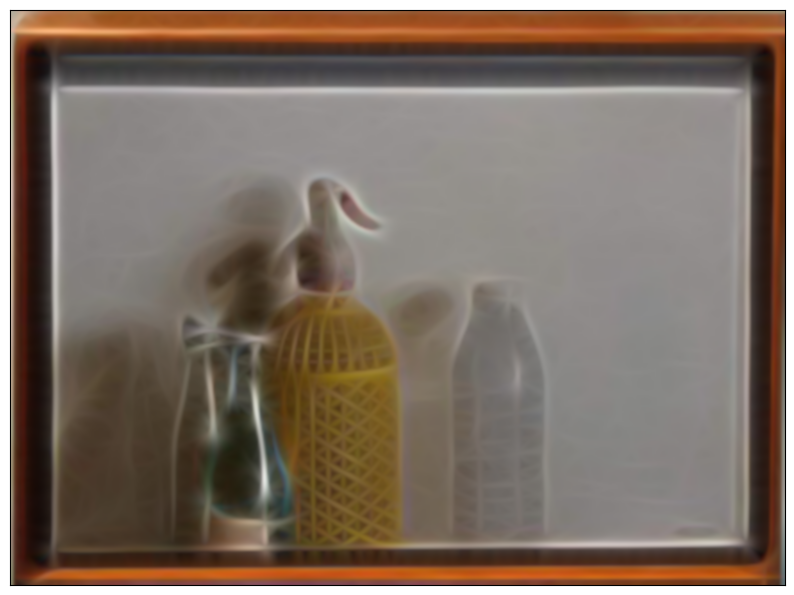

In [29]:
gfilters = create_gaborfilter()
image_g = apply_filter(images[2], gfilters)
 
showimage(image_g)

In [16]:
pywt.wavelist(kind='discrete')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

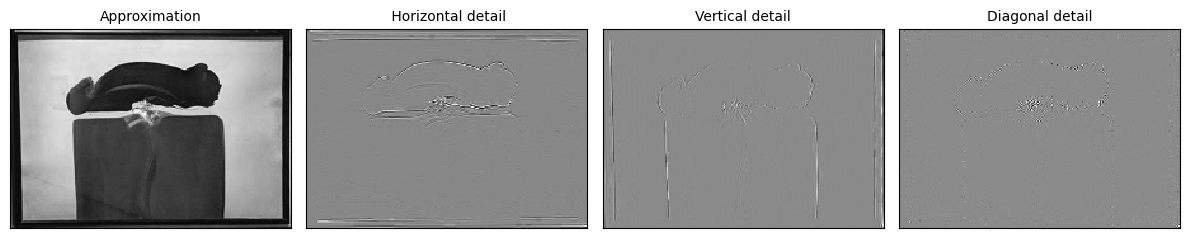

In [50]:
# Load image
original =cv2.cvtColor(images[6], cv2.COLOR_RGB2GRAY)

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'coif1')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 3.0000e+00,
        3.0000e+00, 3.0000e+00, 9.0000e+00, 7.0000e+00, 9.0000e+00,
        1.3000e+01, 1.4000e+01, 1.2000e+01, 1.1000e+01, 1.0000e+01,
        1.3000e+01, 8.0000e+00, 6.0000e+00, 2.3000e+01, 1.0000e+01,
        9.0000e+00, 2.2000e+01, 3.0000e+01, 2.0000e+01, 1.0000e+01,
        3.8000e+01, 2.6000e+01, 2.2000e+01, 2.2000e+01, 3.0000e+01,
        5.8000e+01, 4.0000e+01, 4.0000e+01, 3.8000e+01, 6.6000e+01,
        7.6000e+01, 8.9000e+01, 1.1900e+02, 1.3300e+02, 1.2400e+02,
        1.2100e+02, 1.5900e+02, 1.7700e+02, 2.3000e+02, 3.4500e+02,
        6.6300e+02, 2.3480e+03, 1.9525e+04, 6.3200e+03, 1.2580e+03,
        5.6100e+02, 3.4100e+02, 2.3400e+02, 1.56

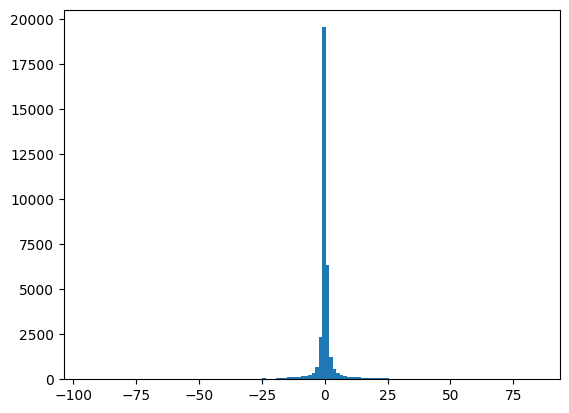

In [60]:
plt.hist(LH.flatten(), bins=128)

In [57]:
np.histogram(HL.flatten(), bins=128)[0]

array([    1,     1,     0,     0,     0,     0,     0,     1,     0,
           0,     0,     0,     0,     1,     0,     0,     0,     0,
           1,     2,     2,     0,     0,     0,     1,     3,     0,
           6,     2,     7,     6,    10,     2,     3,     5,    14,
           7,    15,    13,     5,     5,     6,     7,     9,    21,
          21,    17,    18,    24,    23,    30,    32,    41,    29,
          35,    35,    22,    35,    35,    60,    74,    51,    76,
          81,   126,   181,   411,   891,  5735, 22314,  2171,   679,
         359,   214,   117,    68,    69,    63,    47,    54,    44,
          45,    45,    28,    23,    21,    25,    20,    21,    19,
          20,    13,     8,    14,    19,    12,    11,     7,     6,
          11,     5,     7,     1,    13,     3,     3,     4,     0,
           6,     1,     2,     1,     0,     0,     0,     0,     1,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     1]